<a href="https://colab.research.google.com/github/amoreano/pool/blob/main/RendiEscolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install scikit-learn==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importando librerias

In [61]:
import numpy as np
from sklearn import svm
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import sklearn
sklearn.__version__


'1.0.2'

In [62]:
!python3 --version

Python 3.8.16


Cargando DataFrame "rendimiento.csv" 

In [63]:
df_rendimiento=pd.read_csv("/content/RendimientoEscolar.csv", sep=";")

In [64]:
df_rendimiento.head()

,Marca temporal,Género,Edad,Grado de estudios,Distrito en el que vives,Trabajas,Consumes drogas,Consumes licor,Llegas puntual a las clases,Perteneces a alguna pandilla,...,Nivel de educación de su madre,De qué manera el stress influye en su vida escolar,Tiene empatía hacia sus compañeros,Cuando obtienes malas notas. Te sientes,Que cantidad de amigos te gustaría tener,Cantidad de horas que trabaja a la semana,Ingreso familiar aproximado mensualmente,Sus estudios iniciales en que establecimiento lo realizó,Establecimiento en el que estudia es,Promedio ponderado durante el año
0,10/24/2022 10:15:39,2,15,2,2,1,2,2,3,2,...,2,4,2,1,2,1,2,1,Público,15
1,10/24/2022 10:18:29,2,14,2,1,2,2,2,1,2,...,4,3,1,1,3,0,4,1,Público,18
2,10/24/2022 10:21:52,1,16,1,1,1,2,1,3,2,...,1,2,4,4,1,1,1,1,Público,13
3,10/24/2022 10:25:45,1,17,1,1,1,1,1,2,1,...,1,2,1,3,2,1,2,1,Público,11
4,10/24/2022 10:27:46,2,16,1,1,2,2,2,3,2,...,2,4,2,1,2,0,2,3,Público,16


In [65]:
# visualizando el tipo de dato del data frame
df_rendimiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 37 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   Marca temporal                                                                      101 non-null    object
 1   Género                                                                              101 non-null    int64 
 2   Edad                                                                                101 non-null    int64 
 3   Grado de estudios                                                                   101 non-null    int64 
 4   Distrito en el que vives                                                            101 non-null    int64 
 5   Trabajas                                                                            101 non-null    int64 

In [66]:
# Hacemos un resumen con la estadistica descriptiva
df_rendimiento.shape

(101, 37)

Depurando datos

In [67]:
#Depurando las variables "Marca temporal, Distrito en el que vives, Cuál de las siguientes redes sociales usas para buscar información para tus tareas, Establecimiento en el que estudia es", por ser irrelevante para el estudio 
df_rendimiento.drop(['Marca temporal'], axis = 1, inplace=True)
df_rendimiento.drop(['Distrito en el que vives'], axis = 1, inplace=True)
df_rendimiento.drop(['Cuál de las siguientes redes sociales usas para buscar información para tus tareas'], axis = 1, inplace=True)
df_rendimiento.drop(['Establecimiento en el que estudia es'], axis = 1, inplace=True)
df_rendimiento.drop(['Dependes de alguna persona'], axis = 1, inplace=True)

In [68]:
df_rendimiento.describe()

,Género,Edad,Grado de estudios,Trabajas,Consumes drogas,Consumes licor,Llegas puntual a las clases,Perteneces a alguna pandilla,Qué tan responsable se considera,Considera posible terminar el año escolar,...,Nivel de educación de su padre,Nivel de educación de su madre,De qué manera el stress influye en su vida escolar,Tiene empatía hacia sus compañeros,Cuando obtienes malas notas. Te sientes,Que cantidad de amigos te gustaría tener,Cantidad de horas que trabaja a la semana,Ingreso familiar aproximado mensualmente,Sus estudios iniciales en que establecimiento lo realizó,Promedio ponderado durante el año
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,1.514851,15.683168,1.495050,1.732673,1.900990,1.851485,2.079208,1.891089,1.950495,1.534653,...,3.297030,2.762376,3.049505,2.425743,2.257426,2.237624,0.346535,2.534653,1.316832,14.465347
std,0.502272,0.773701,0.502469,0.444772,0.300165,0.357383,0.976557,0.313081,0.841145,0.855153,...,0.819079,1.011420,0.683758,1.298819,1.308843,0.838433,0.478239,0.975339,0.508541,2.447711
min,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,10.000000
25%,1.000000,15.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,2.000000,1.000000,13.000000
50%,2.000000,16.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,...,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,0.000000,3.000000,1.000000,15.000000
75%,2.000000,16.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,1.000000,3.000000,2.000000,16.000000
max,2.000000,17.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,3.000000,...,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,1.000000,4.000000,3.000000,20.000000


In [69]:
# Convirtiendo la variable rendimiento de multiclase a clasificación docotomica
df_rendimiento['rendimientoT'] = np.where(df_rendimiento['Promedio ponderado durante el año']>=11, 'Aprobado', 'Desaprobado')
df_rendimiento

,Género,Edad,Grado de estudios,Trabajas,Consumes drogas,Consumes licor,Llegas puntual a las clases,Perteneces a alguna pandilla,Qué tan responsable se considera,Considera posible terminar el año escolar,...,Nivel de educación de su madre,De qué manera el stress influye en su vida escolar,Tiene empatía hacia sus compañeros,Cuando obtienes malas notas. Te sientes,Que cantidad de amigos te gustaría tener,Cantidad de horas que trabaja a la semana,Ingreso familiar aproximado mensualmente,Sus estudios iniciales en que establecimiento lo realizó,Promedio ponderado durante el año,rendimientoT
0,2,15,2,1,2,2,3,2,1,1,...,2,4,2,1,2,1,2,1,15,Aprobado
1,2,14,2,2,2,2,1,2,1,1,...,4,3,1,1,3,0,4,1,18,Aprobado
2,1,16,1,1,2,1,3,2,4,1,...,1,2,4,4,1,1,1,1,13,Aprobado
3,1,17,1,1,1,1,2,1,3,3,...,1,2,1,3,2,1,2,1,11,Aprobado
4,2,16,1,2,2,2,3,2,2,1,...,2,4,2,1,2,0,2,3,16,Aprobado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,16,1,2,1,2,1,1,1,1,...,2,3,5,3,3,1,4,1,17,Aprobado
97,1,16,1,1,2,2,1,2,1,1,...,2,3,1,1,3,1,2,1,14,Aprobado
98,2,17,1,2,2,1,3,2,3,3,...,1,5,4,4,3,0,1,1,12,Aprobado
99,2,16,1,2,2,2,1,2,1,1,...,2,3,4,2,3,0,2,1,13,Aprobado


In [70]:
#Hay un desbalance entre aprobado y Desaprobados estos datos debemos balancear
count_rendimientoT_Aprobado, count_rendimientoT_Desaprobado = df_rendimiento.rendimientoT.value_counts()
print ('Cantidad por filas de rendimientoT')
print('rendimientoT_Desaprobado: ',count_rendimientoT_Desaprobado)
print('rendimientoT_Aprobado  : ',count_rendimientoT_Aprobado)

Cantidad por filas de rendimientoT
rendimientoT_Desaprobado:  7
rendimientoT_Aprobado  :  94


In [71]:
# Dividiendo por sets el rendimientoT
df_rendimientoT_Desaprobado = df_rendimiento[df_rendimiento['rendimientoT'] == 'Desaprobado']
df_rendimientoT_Aprobado = df_rendimiento[df_rendimiento['rendimientoT'] == 'Aprobado']

print('Dimensión por tipo de rendimientoT')
print('Dim rendimientoT Desaprobado: ',df_rendimientoT_Desaprobado.shape)
print('Dim rendimientoT Aprobado   : ',df_rendimientoT_Aprobado.shape)

Dimensión por tipo de rendimientoT
Dim rendimientoT Desaprobado:  (7, 33)
Dim rendimientoT Aprobado   :  (94, 33)


In [72]:
#Balanceo se define df_under como el data frame final
df_rendimientoT_Aprobado_under = df_rendimientoT_Aprobado.sample(count_rendimientoT_Desaprobado) 

# dataframe Balanceado.
df_under = pd.concat([df_rendimientoT_Aprobado_under, df_rendimientoT_Desaprobado], axis=0)

In [73]:
#Imprimiendo valores
print('Dimensión por tipo de rendimientoT en general')
print('')
print('Dim df_rendimientoT_Aprobado under: ',df_rendimientoT_Aprobado_under.shape)
print('Dim df_rendimientoT_Desaprobado under  : ',df_rendimientoT_Desaprobado.shape)
print('                                    =========')
print('Dim df_under                     : ',df_under.shape)

Dimensión por tipo de rendimientoT en general

Dim df_rendimientoT_Aprobado under:  (7, 33)
Dim df_rendimientoT_Desaprobado under  :  (7, 33)
Dim df_under                     :  (14, 33)


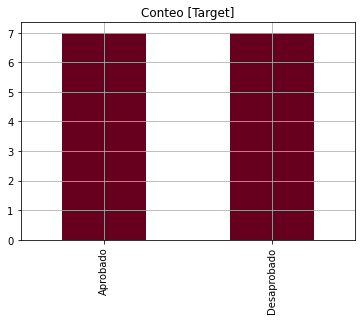

In [74]:
df_under.rendimientoT.value_counts().plot(kind='bar', title='Conteo [Target]', grid=bool, cmap="RdBu" );

In [75]:
df_rendimiento=df_under.copy()

In [76]:
df_rendimiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 52 to 76
Data columns (total 33 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Género                                                                          14 non-null     int64 
 1   Edad                                                                            14 non-null     int64 
 2   Grado de estudios                                                               14 non-null     int64 
 3   Trabajas                                                                        14 non-null     int64 
 4   Consumes drogas                                                                 14 non-null     int64 
 5   Consumes licor                                                                  14 non-null     int64 
 6   Llegas puntual a las  clase

In [77]:
#variables independientes
X=df_rendimiento.drop(["rendimientoT"], axis=1)
X.head

<bound method NDFrame.head of     Género  Edad  Grado de estudios  Trabajas  Consumes drogas  \
52       2    15                  2         1                2   
86       1    15                  2         1                2   
30       2    16                  1         2                2   
88       2    16                  1         2                2   
56       1    16                  1         2                2   
36       2    15                  2         2                2   
70       2    16                  1         2                2   
41       2    15                  2         2                2   
48       2    15                  2         1                1   
58       1    17                  1         1                1   
66       1    15                  2         2                2   
69       1    16                  1         1                2   
72       1    15                  2         2                2   
76       2    16                  1         2 

In [78]:
#Variable dependiente
Y=df_rendimiento.pop("rendimientoT")
Y

52       Aprobado
86       Aprobado
30       Aprobado
88       Aprobado
56       Aprobado
36       Aprobado
70       Aprobado
41    Desaprobado
48    Desaprobado
58    Desaprobado
66    Desaprobado
69    Desaprobado
72    Desaprobado
76    Desaprobado
Name: rendimientoT, dtype: object

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

#**Modelo SVM**

In [80]:
# Creamos el modelo SVM para clasificacion con kernel lineal/rbf y entrenamos el modelo
model = svm.SVC(kernel='linear', C=100).fit(X_train, y_train)

In [81]:
# Grabamos el modelo en el directorio
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [82]:
# Cargamos el modelo
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

In [83]:
# Encontramos el accuracy promedio usando datos de test
score = model.score(X_test, y_test)
print(score)

1.0


In [85]:
x_in = np.asarray([[1,1,1,2,3,1,1,1,2,1,4,1,1,4,1,1,1,2,3,1,1,1,2,1,4,1,1,4,1,1,1,10]]).reshape(1,-1)
predictS = model.predict(x_in)
predictS[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'Desaprobado'